# Métriques pour évaluer les modèles de ML

Métriques que l'on va voir aujourd'hui pour la **classification**, puis pour la **régression**: 

- Accuracy
- Precision
- Recall 
- F1 Score
- Matrice de confusion
---
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- R2
- R2 Ajusté

---

## Classification

### 1. Modèle SVC sur le dataset des vins, puis calcul des scores

In [95]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Chargement des données
data = load_wine()
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target)

# Entraînement du modèle de classification
model = SVC(probability=True)
model.fit(X_train, Y_train)

# Prédictions
Y_pred = model.predict(X_test)

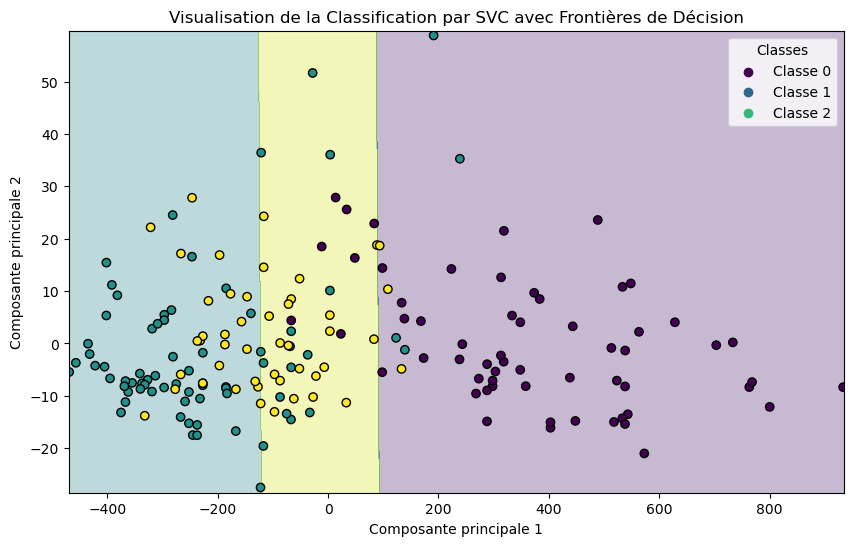

In [96]:
# Calcul des métriques de classification
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print("-------------------------")
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Precision: {round(precision, 2)}")
print(f"Recall: {round(recall, 2)}")
print(f"F1 Score: {round(f1, 2)}")
print("-------------------------")

-------------------------
Accuracy: 0.56
Precision: 0.42
Recall: 0.54
F1 Score: 0.46
-------------------------


### 2. Explication des différentes mesures

- **Accuracy** : L’accuracy mesure la proportion de prédictions correctes parmi toutes les prédictions. Elle est utile pour les classes équilibrées mais peut induire en erreur si les classes sont déséquilibrées.


- **Precision** : La précision indique la proportion de prédictions positives qui sont correctes. Elle sert à miniser les faux positifs (classifier une sample alors qu'elle ne devrait pas l'être)


- **Recall** : Le recall indique les vrais positifs parmi toutes les samples. Il sert à minimiser les faux négatifs (on évite de rater des cas positifs importants)


- **F1 Score** : Le F1 Score combine précision et rappel en un, en prenant leur moyenne harmonique. Cela sert notamment lorsque les classes sont déséquilibrées.

Note : classes déséquilibrées = grand écart entre la quantité de telle ou telle classe dans les données d'entraînement et de test.

### 3. Matrice de Confusion

La matrice de confusion est un moyen super visuel de se rendre compte des erreurs du modèles : quelles classes sont bien classifiées, et quelles classes sont facilement confondues par le modèle (ici, la 2 est prise pour la 1)


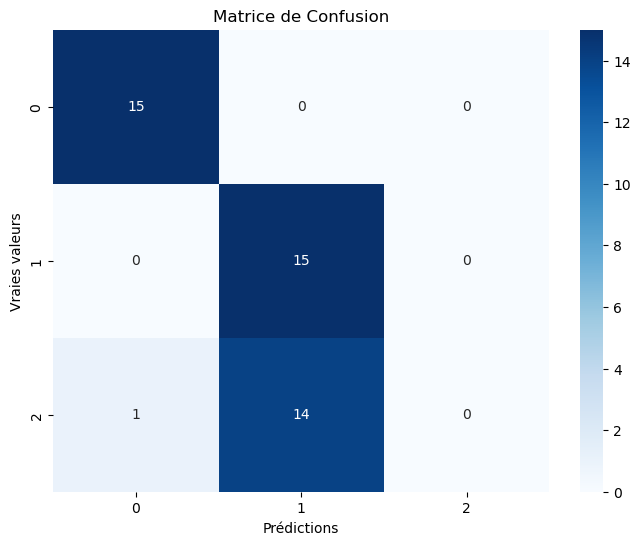

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# On calcule notre matric de confusion
conf_matrix = confusion_matrix(Y_test, Y_pred)

# On la visualise
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion")
plt.show()

---
## Régression

### 1. On prépare nos données et modèle pour calcul

Text(0.5, 1.0, 'Simple régression linéaire sur donnée avec bruit')

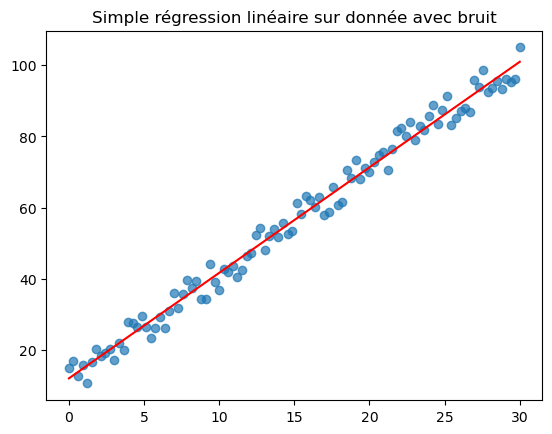

In [86]:
from sklearn.linear_model import LinearRegression

# On génère les données avec du bruit
X = np.linspace(0,30, 100).reshape(-1, 1)
Y = (3 * X + 7 + np.random.randint(0, 10, (100, 1))).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Une régression linéaire simple pour montrer ensuite les scores
model = LinearRegression()
model.fit(X_train, Y_train)

plt.scatter(X, Y, alpha=0.7)
plt.plot(X, model.predict(X), color="red")
plt.title("Simple régression linéaire sur donnée avec bruit")


### 2. On calcule toutes nos métriques

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# On prédit nos données test
Y_pred = model.predict(X_test)

# On calcule nos métriques
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Calcul du R2 ajusté
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("-------------------------")
print(f"Mean Absolute Error (MAE) : {round(mae, 2)}")
print(f"Mean Squared Error (MSE) : {round(mse, 2)}")
print(f"Root Mean Squared Error (RMSE) : {round(rmse, 2)}")
print(f"R2-Score : {round(r2, 2)}")
print(f"Adjusted R2-Score : {round(adjusted_r2, 2)}")
print("-------------------------")

-------------------------
Mean Absolute Error (MAE) : 2.36
Mean Squared Error (MSE) : 8.11
Root Mean Squared Error (RMSE) : 2.85
R2-Score : 0.99
Adjusted R2-Score : 0.99
-------------------------


### 3. Alors, à quoi correspond tout cela ?

- **L'erreur absolue moyenne (MAE)** mesure la magnitude moyenne des erreurs de prédiction. Elle se calcule en faisant la somme des valeurs absolues des écarts. 


- **L'erreur quadratique moyenne (MSE)** mesure la même chose que la MAE, mais punit davantage les écarts importants puisque l'on somme les carrés des écarts.


- **La racine de l'erreur quadratique moyenne (RMSE)** diffère de la MAE en conservant l'importance mise sur les écarts importants pusisqu'elle dérive de la MSE, mais est exprimée dans la même unité que les variables.


- **Le coefficient de détermination**, R², indique la proportion de la variance de la variable cible qui est expliquée par le modèle.


- **Le R² ajusté** permet d'éviter un biais du R², qui est d'augmenter quand on augmente le nombre de variables, ce qui peut mener à des cas d'overfitting. Le R² ajusté tente de mesurer l'effet d'amélioration réel d'une variable supplémentaire.